# Assignment 11: Exercise 2

In [1]:
%cd C:\Users\123\Documents\Acad\TA_Inv\year18

C:\Users\123\Documents\Acad\TA_Inv\year18


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [79]:
print(df_weq)

               w
Australia  0.016
Canada     0.022
France     0.052
Germany    0.055
Japan      0.116
UK         0.124
US         0.615


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_corr = pd.read_excel('BL_data.xlsx','Sheet1',usecols=range(8),index_col=0)
df_weq  = pd.read_excel('BL_data.xlsx','Sheet1',usecols=[0,11],index_col=0)
df_sig  = pd.read_excel('BL_data.xlsx','Sheet1',usecols=[0,10],index_col=0)

gamma   = 2.5
tau     = 0.05
Om_diag = np.array([0.021,0.017,0.03])*tau

N       = len(df_sig)
vec1    = np.ones((N,1))
weq     = df_weq.values.reshape((N,1))
sig     = df_sig.values.reshape((N,1))
Sigma   = np.multiply(np.multiply((sig@vec1.T),df_corr.values),(vec1@sig.T))


(a)

In [86]:
mu0 = gamma*(Sigma@weq)
display(pd.DataFrame(data=np.around(mu0,4),columns=['$\mu_0$'],index=df_weq.index))


,$\mu_0$
Australia,0.0394
Canada,0.0692
France,0.0836
Germany,0.0903
Japan,0.0430
UK,0.0677
US,0.0756


(b)

In [87]:
Omega0       = tau*Sigma
mu_hat       = mu0
Sigma_hat    = Sigma+Omega0

w0 = np.linalg.inv(gamma*Sigma_hat)@mu_hat
display(pd.DataFrame(data=np.around(np.concatenate((w0,np.add(w0,-weq)),axis=1),4),columns=['$w_0$','$w_0$-$w_{eq}$'],index=df_weq.index))


,$w_0$,$w_0$-$w_{eq}$
Australia,0.0152,-0.0008
Canada,0.0210,-0.0010
France,0.0495,-0.0025
Germany,0.0524,-0.0026
Japan,0.1105,-0.0055
UK,0.1181,-0.0059
US,0.5857,-0.0293


(c)

In [117]:
q   = np.array([0.05,0.03]).reshape((2,1))
P1  = np.array([0,0,float(-weq[2]/(weq[2]+weq[5])),1,0,-float(weq[5]/(weq[2]+weq[5])),0])
P2  = np.array([0,1,0,0,0,0,-1])
P   = np.vstack((P1,P2))

Omega       = np.diag(Om_diag[:2])

# Posterior distribution
def posterior_dist(mu0,Omega0,q,Omega,P):
    mu_hat     = mu0+(Omega0@P.T)@np.linalg.inv((P@Omega0)@P.T+Omega)@(q-P@mu0)
    Omega_hat  = Omega0-(Omega0@P.T)@np.linalg.inv(P@(Omega0@P.T)+Omega)@(P@Omega0)
    return mu_hat,Omega_hat
    
#Formula 1:
mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega,P)
print('The posterior distribution of the mean return has mean:')
display(pd.DataFrame(data=np.around(mu_hat,4),columns=['$\hat{\mu}$'],index=df_weq.index))
print('and variance-covariance matrix:')
display(pd.DataFrame(data=np.around(Omega_hat,4),columns=df_weq.index,index=df_weq.index))

#Formula 2:
invOmega0  = np.linalg.inv(Omega0)
invOmega   = np.linalg.inv(Omega)

mu_hat2    = np.linalg.inv(invOmega0+P.T@invOmega@P)@(invOmega0@mu0+P.T@invOmega@q)
Omega_hat2 = np.linalg.inv(invOmega0+P.T@invOmega@P)

#Verify that both formulas agree:
print('The formulas on slide 11 indeed give the same answers:')
print(np.max(np.abs(mu_hat-mu_hat2)))
print(np.max(np.abs(Omega_hat-Omega_hat2)))



The posterior distribution of the mean return has mean:


,$\hat{\mu}$
Australia,0.0442
Canada,0.0874
France,0.0949
Germany,0.1122
Japan,0.0462
UK,0.0697
US,0.0748


and variance-covariance matrix:


,Australia,Canada,France,Germany,Japan,UK,US
Australia,0.0012,0.0007,0.0009,0.0010,0.0007,0.0008,0.0007
Canada,0.0007,0.0018,0.0015,0.0015,0.0006,0.0012,0.0015
France,0.0009,0.0015,0.0029,0.0025,0.0009,0.0019,0.0015
Germany,0.0010,0.0015,0.0025,0.0028,0.0009,0.0020,0.0015
Japan,0.0007,0.0006,0.0009,0.0009,0.0022,0.0008,0.0006
UK,0.0008,0.0012,0.0019,0.0020,0.0008,0.0020,0.0012
US,0.0007,0.0015,0.0015,0.0015,0.0006,0.0012,0.0016


The formulas on slide 11 indeed give the same answers:
6.938893903907228e-17
3.469446951953614e-18


(d)

In [118]:
def black_litterman(mu0,q,Omega,tau,P,gamma):
    Omega0     = tau*Sigma
    Lambda     = np.linalg.inv((P@Sigma)@P.T+(1+1/tau)*Omega)@(q-1/(1+tau)*(P@mu0))/gamma
    w          = w0+P.T@Lambda
    return w,Lambda

ws,Lambda  = black_litterman(mu0,q,Omega,tau,P,gamma)

display(pd.DataFrame(data=np.around(np.concatenate((ws,np.add(ws,-w0),np.add(ws,-weq)),axis=1),4),\
     columns=['$w^*$','$w^*$-$w_0$','$w^*$-$w_{eq}$'],index=df_weq.index))


,$w^*$,$w^*$-$w_0$,$w^*$-$w_{eq}$
Australia,0.0152,0.0000,-0.0008
Canada,0.4189,0.3980,0.3969
France,-0.0349,-0.0844,-0.0869
Germany,0.3381,0.2857,0.2831
Japan,0.1105,0.0000,-0.0055
UK,-0.0832,-0.2013,-0.2072
US,0.1877,-0.3980,-0.4273


(e)

In [119]:
display(pd.DataFrame(data=np.around(Lambda,3),\
     columns=['view-weights'],index=['$\lambda_1$','$\lambda_2$']))


,view-weights
$\lambda_1$,0.286
$\lambda_2$,0.398


(f)

In [120]:
q   = np.array([0.05,0.03,0.055]).reshape((3,1))
P3  = np.array([0,0,0,0,1,0,0])
P   = np.vstack((P1,P2,P3))

Omega = np.diag(Om_diag)
mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega,P)
ws,Lambda = black_litterman(mu0,q,Omega,tau,P,gamma)

display(pd.DataFrame(data=np.around(ws,4),\
     columns=['$w^*$'],index=df_weq.index))
display(pd.DataFrame(data=np.around(Lambda,4),\
     columns=['view-weights'],index=['$\lambda_1$','$\lambda_2$','$\lambda_3$']))


,$w^*$
Australia,0.0152
Canada,0.4171
France,-0.0338
Germany,0.3345
Japan,0.1683
UK,-0.0807
US,0.1895


,view-weights
$\lambda_1$,0.2822
$\lambda_2$,0.3962
$\lambda_3$,0.0578


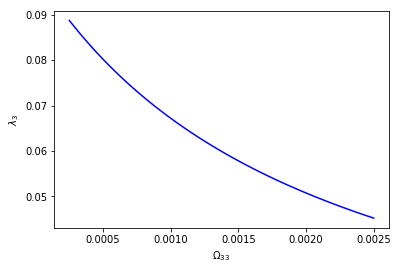

In [121]:
Np         = 100
Om33_grd   = np.linspace(0.005,0.05,Np)*tau
Lambda_grd = np.empty((100,3)) 
for i in range(Np): 
    Om_diag_    = Om_diag
    Om_diag_[2] = Om33_grd[i]
    Omega       = np.diag(Om_diag[:3])
    
    mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega,P)
    ws,Lambda  = black_litterman(mu0,q,Omega,tau,P,gamma)
    Lambda_grd[i,:] = Lambda.T

plt.plot(Om33_grd,Lambda_grd[:,2],'b-')
plt.xlabel('$\Omega_{33}$')
plt.ylabel('$\lambda_3$')
plt.show()
